## R 기본제공 graphics-2

### 그래프 유형

## 원도표
- 데이터 유형을 벡터, 테이블, 데이터 프레임으로 지정하는게 좋다 => 별도의 과정없이 원도표 바로 만들어주기 때문
- labels : 실제 표시되는 각 구역의 레이블
- labels 옵션에 paste함수 이용해서 보다 자세한 표기 가능 

 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"


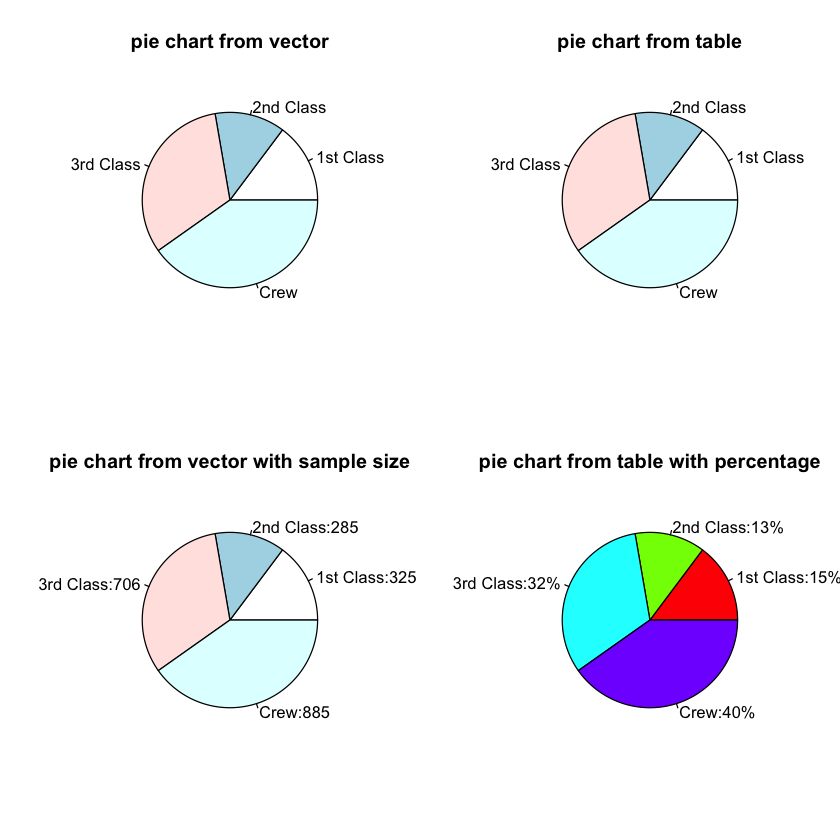

In [18]:
par(mfrow = c(2,2))
slice <-c(325,285,706,885)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
pie(slice,labels=label,main='pie chart from vector')

str(Titanic)
class.table<-margin.table(Titanic,margin=1)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
pie(class.table,labels=label,main='pie chart from table')

slice <-c(325,285,706,885)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
label<-paste(label,slice,sep=":")
pie(slice,labels=label,main='pie chart from vector with sample size')


class.table<-margin.table(Titanic,margin=1)
label <-c('1st Class',"2nd Class","3rd Class","Crew")
label<-paste(label,":",round(class.table/sum(class.table)*100),"%",sep="")
pie(class.table,labels=label,main='pie chart from table with percentage',
   col=rainbow(length(class.table)))

## 막대도표
- 범주의 이름을 바꿀댄 names.arg : xlab이랑 또 다르다
- legend 옵션 주면 (2차원 데이터 형식일때) 범주값 알아서 생성해줌
- 2차원 데이터 일때 col =c(color1,color2)
- rank 와 색상 파레트 이용해서 막대의 상대적인 높이 강조 가능
- density angle space border 등의 옵션 사용 가능

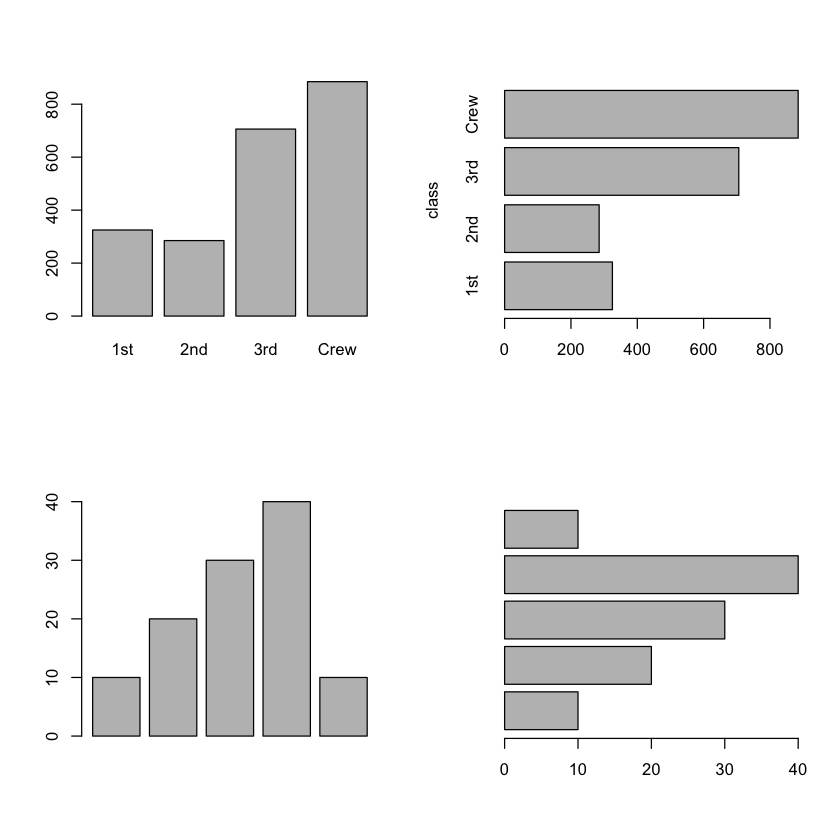

In [25]:
# 1차원 데이타

# 1차원 테이블
par(mfrow=c(2,2))
class.table <- margin.table(Titanic,1)
barplot(class.table)
barplot(class.table,ylab='class',horiz = T)
# 1차원 벡터
barplot(c(10,20,30,40,10))
barplot(c(10,20,30,40,10),horiz = T)

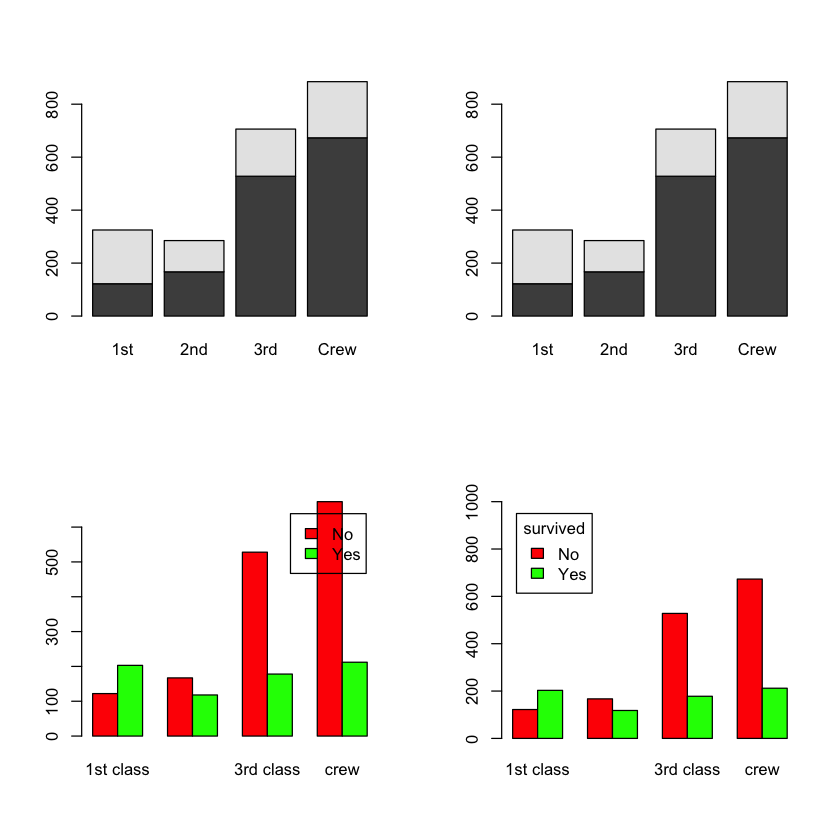

In [88]:
# 2차원 데이타(행렬,테이블) => 막대가 쌓인다
par(mfrow=c(2,2))
# 행렬 
survived.by.class<-margin.table(Titanic,c(4,1))
barplot(survived.by.class)
barplot(as.matrix(survived.by.class))

barplot(survived.by.class,beside = T,
        names.arg = c('1st class','2nd class','3rd class','crew'),
       col=c('red','green'),legend=T) #legned 옵션이 가린다 아래에 명시적으로 쓰자


barplot(survived.by.class,beside = T,ylim=c(0,1000),
        names.arg = c('1st class','2nd class','3rd class','crew'),
       col=c('red','green'))
legend('topleft',legend = c('No','Yes'),inset=0.05,
       title='survived',fill=c('red','green'))


        Class
Survived       1st       2nd       3rd      Crew
     No  0.3753846 0.5859649 0.7478754 0.7604520
     Yes 0.6246154 0.4140351 0.2521246 0.2395480

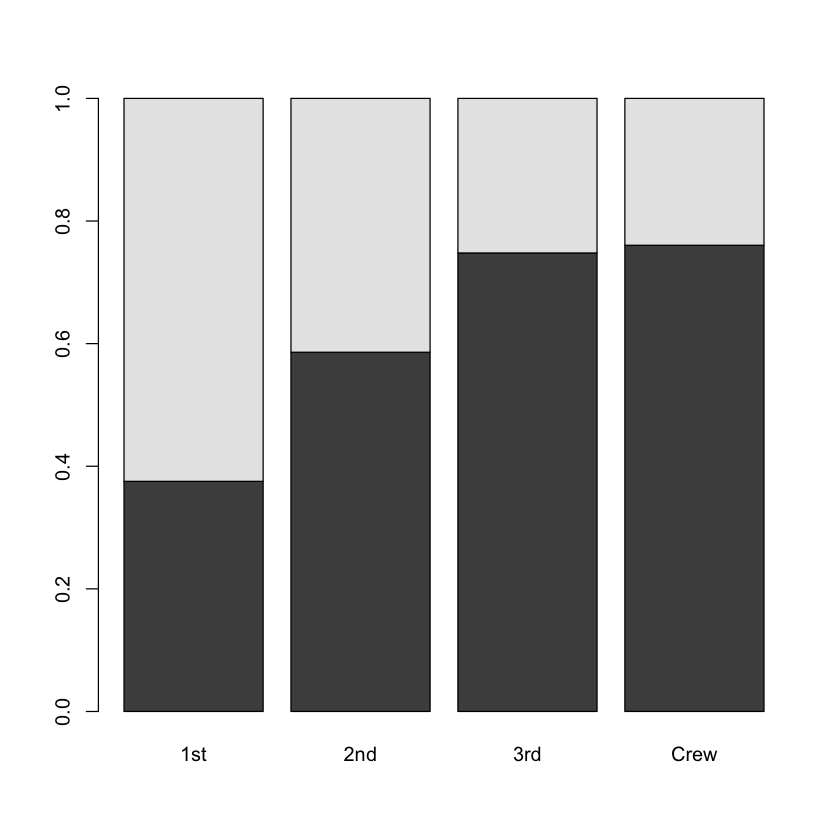

In [51]:
#척도 100%로 조정된 막대도표
#아래가 Survived No
#위에 Survived Yes
survived.by.class<-margin.table(Titanic,c(4,1))
prop.table(survived.by.class,margin=2) # margin을 1로 주면 행의 비율 2로주변 열의 비율
survived.prop <- prop.table(survived.by.class,margin=2)
barplot(survived.prop)

#그래프를 보면 1등석이 생존자의 비율이 제일 높다느걸 알수 있다

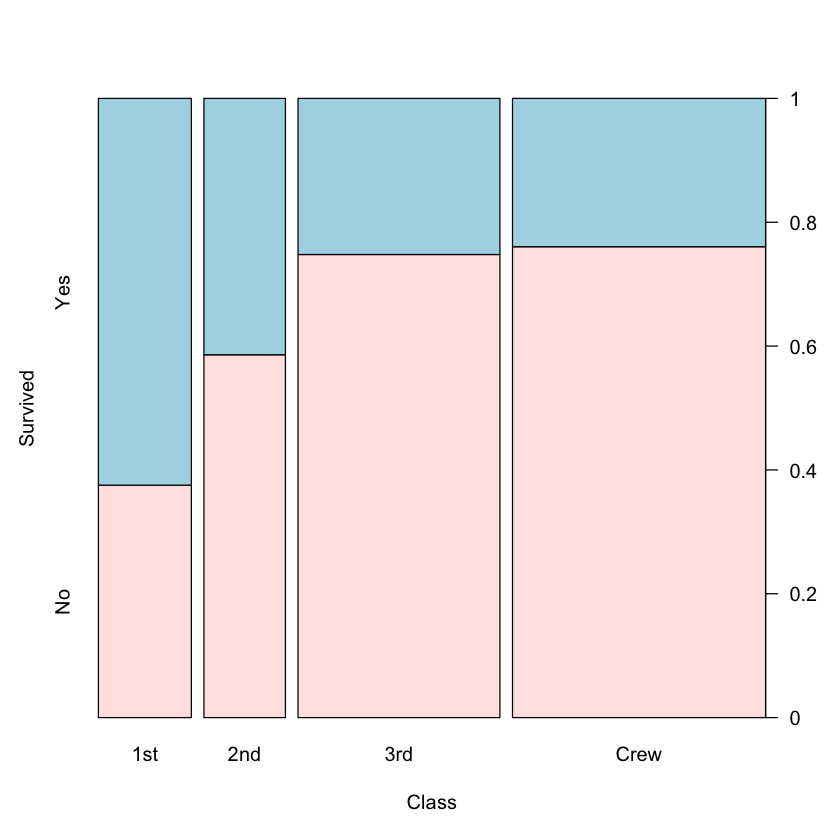

In [55]:
# 스파인 도표
# 테이블을 비율 형식으로 굳이 변경하지 않고 바로 인수로 사용 가능하다
library(vcd)
survived.by.class<-margin.table(Titanic,c(4,1))
spine(t(survived.by.class),gp=gpar(fill=c('mistyrose','lightblue')))

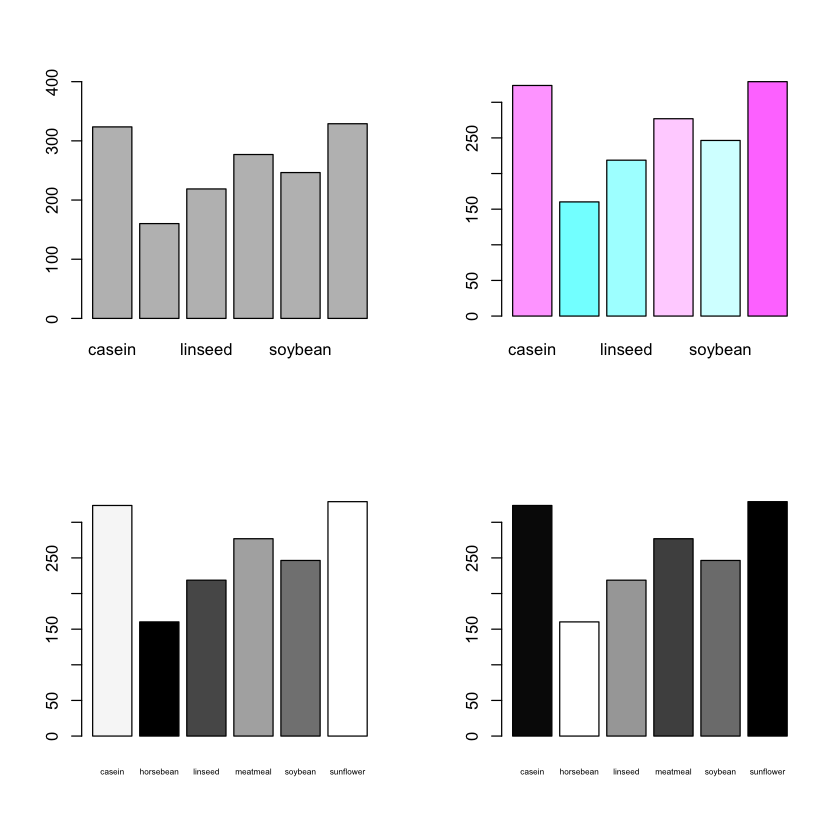

In [77]:
# 색상 그라데이션을 통해 비교를 쉽게해보자
# 색상 파레트 이용가능 cm.colors 혹은 gray를 이용해보자

par(mfrow=c(2,2))
heights <- tapply(chickwts$weight,chickwts$feed,mean)
barplot(heights,ylim=c(0,400))

# cm.colors : 색상 파레트 인덱스 높을수록 자주색 이다
rel.heights <- (heights-min(heights))/(max(heights)-min(heights))
barplot(heights,col=cm.colors(length(rel.heights))[rank(rel.heights)])

# gray : 0~1사이 0에 가까울수록 검은색, 1에 가까울수록 흰색
barplot(heights,col=gray(rel.heights),cex.names = 0.5)
barplot(heights,col=gray(1-rel.heights),cex.names = 0.5)

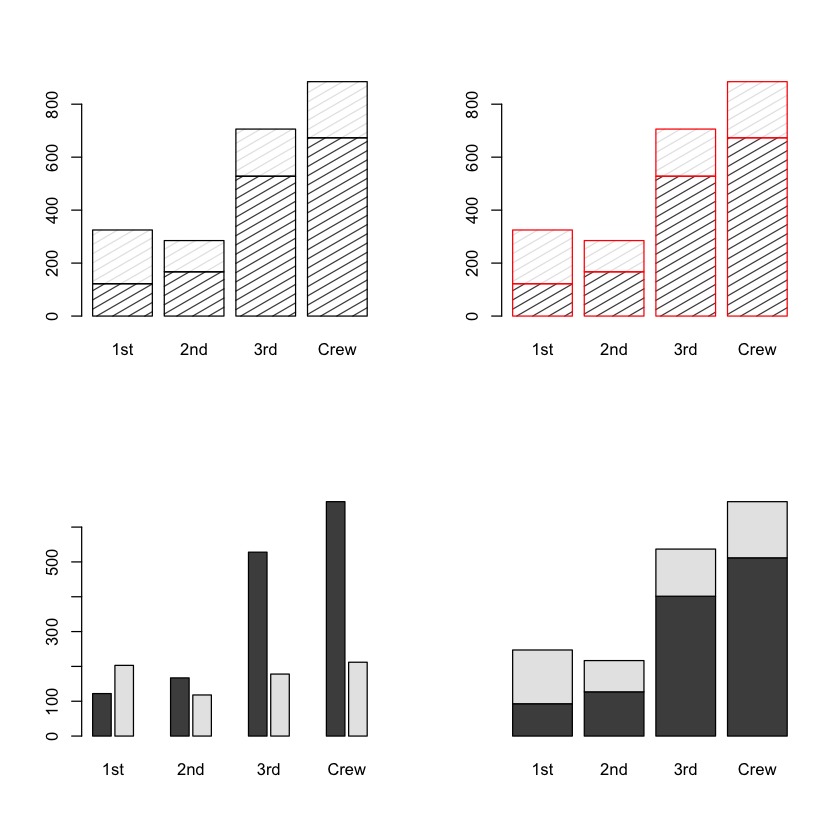

In [86]:
# 다양한 인수 존재
# density angle border space
par(mfrow=c(2,2))
survived.by.class<-margin.table(Titanic,c(4,1))
barplot(survived.by.class,density = 15,angle=30)
barplot(survived.by.class,density = 15,angle=30,border='red')
barplot(survived.by.class,beside=T,space=c(0.2,2)) # space 첫 인자 집단 내 간격, 두번째 인자 집단 간 간격
barplot(survived.by.class,axes = F)

## 히스토그램
- 박스 플랏이랑 다른점 : 박스플랏은 범주형 데이터의 빈도, 히스토그램은 범위(연속형)에 대응하는 빈도다
- breaks 로 구간 bins로 구간의 갯수 설정 가능
- prob freq 옵션으로 상대적 빈도를 사용할건지 설정 가능
- labels=T 옵션을 주면 막대 높이가 막대 상단에 표시됨
- density angle col border xlab ylab 옵션 사용 가능 

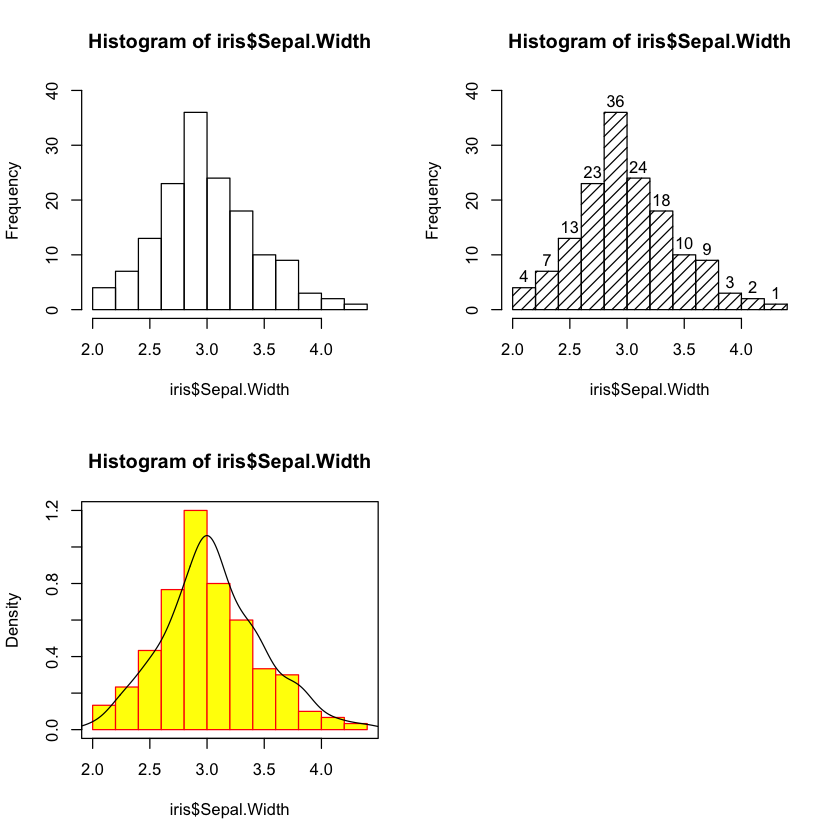

In [101]:
par(mfrow = c(2,2))
hist(iris$Sepal.Width,ylim=c(0,40))

hist(iris$Sepal.Width,ylim=c(0,40),labels = T,density=15,angle=45)

hist(iris$Sepal.Width,col='yellow',border='red',prob=T) #밀도
lines(density(iris$Sepal.Width))
box()

bb


## 밀도 도표

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 5):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 6):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 7):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 8):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



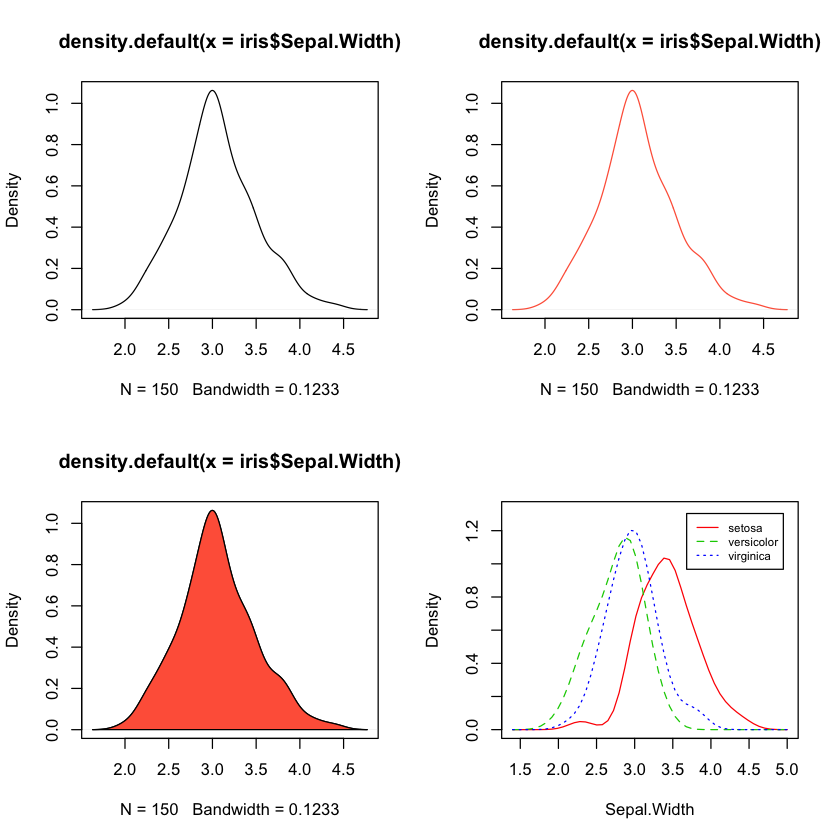

In [125]:
par(mfrow=c(2,2))
plot(density(iris$Sepal.Width))
plot(density(iris$Sepal.Width),col='tomato') # fill 옵션 없다 색상은 선을 의미
plot(density(iris$Sepal.Width))
polygon(density(iris$Sepal.Width),col='tomato')

# 그룹에 따라 밀도 그릴수 있다
# Species 각 레벨에 따라 선 유형 1 2 3 색깔은 2 3 4 가 순차적으로 들어간다
library(sm)
attach(iris)
sm.density.compare(x=Sepal.Width,group=Species,title="density by Species")
legend('topright',inset=0.05,
       legend=levels(Species),lty=1:nlevels(Species),
       col=(1:nlevels(Species))+1,cex=0.7)
detach(iris)

## boxplot
- boxplot.stats() 이상치 포함 통계량 리스트 형태로 돌려줌
- formula 형태로 집단별 분포도 보여줌
- notch 옵션 중위수에 대한 95% 신뢰구간
- varwidth = T 집단별 표본의 크기에 비례한다

In [28]:
boxplot.stats(iris$Sepal.Width)
#$stats => lower whisker, 1th ,2nd,3rd , hiher whisker
#$out :이상치

$stats
[1] 2.2 2.8 3.0 3.3 4.0

$n
[1] 150

$conf
[1] 2.935497 3.064503

$out
[1] 4.4 4.1 4.2 2.0

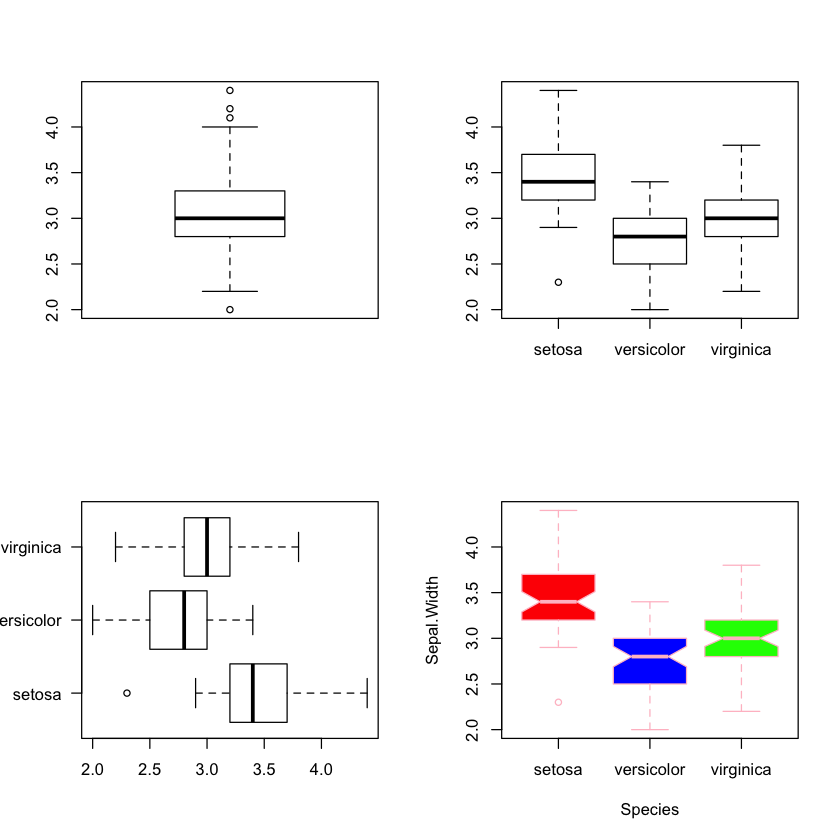

In [31]:
par(mfrow=c(2,2))
boxplot(iris$Sepal.Width)
plot(iris$Species,iris$Sepal.Width,ann=F)
boxplot(Sepal.Width~Species,data=iris,horizontal = T,las=1,ann=F)
boxplot(Sepal.Width~Species,data=iris,notch=T
        ,col=c('red','blue','green'),border='pink')

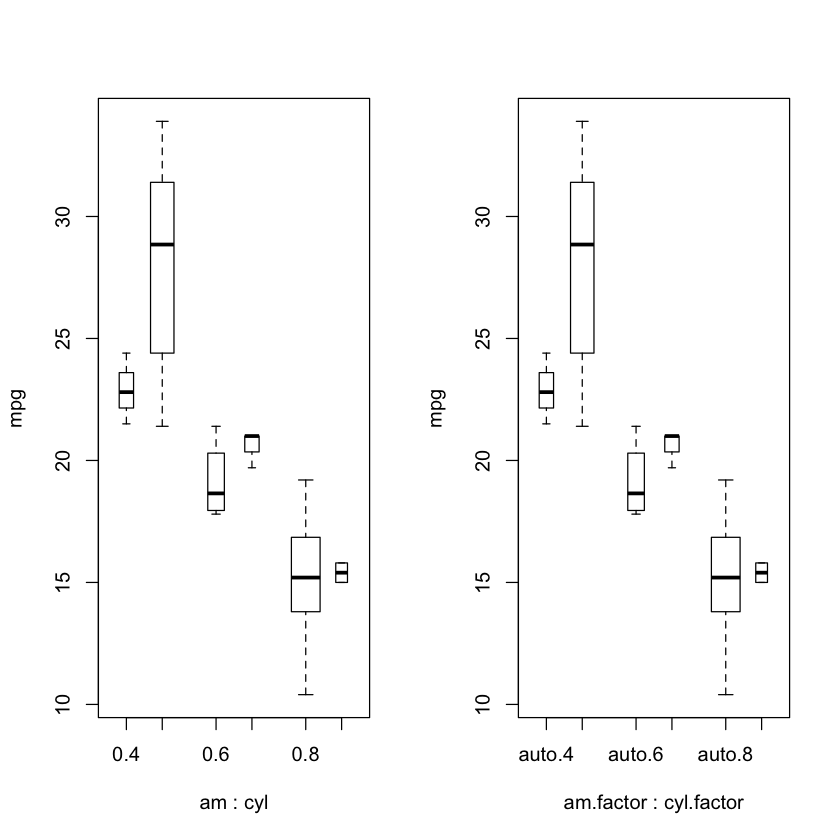

In [33]:
#나누려는 집단이 2개일때
par(mfrow=c(1,2))
boxplot(mpg~am*cyl,data=mtcars,at=c(1,2,3.5,4.5,6,7),varwidth = T)

am.factor <- factor(mtcars$am,levels=c(0,1),labels=c('auto','manual'))
cyl.factor<- factor(mtcars$cyl,levels=c(4,6,8),labels=c('4','6','8'))
boxplot(mpg~am.factor*cyl.factor,data=mtcars,at=c(1,2,3.5,4.5,6,7),varwidth = T)

## 바이올린도표
- boxplot 밖에 밀도도표가 겹쳐 그려진 형태
- 상자 그래프에서 삐져나온 선은 whisker 내에 최대 최소 값들이다

In [35]:
library(vioplot)

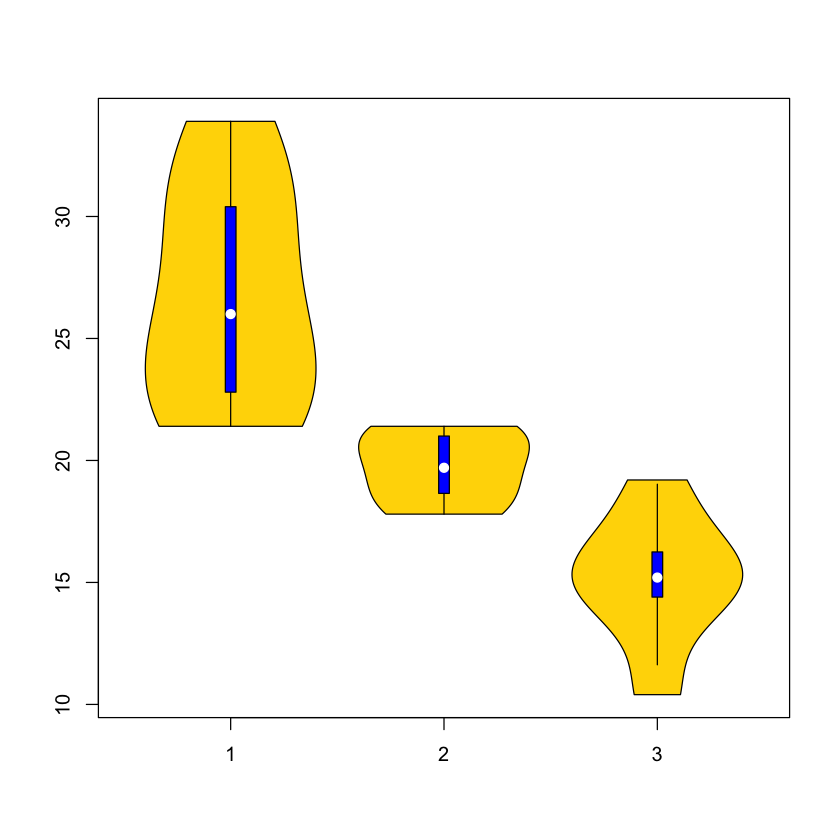

In [40]:
c4<-mtcars$mpg[mtcars$cyl==4]
c6<-mtcars$mpg[mtcars$cyl==6]
c8<-mtcars$mpg[mtcars$cyl==8]
vioplot(c4,c6,c8,col='gold',rectCol = 'blue')

## 점도표
- 이런것도 있구나 알아두는 정도

In [6]:
mtcars$mpg[order(mtcars$mpg)]

[1] 10.4 10.4 13.3 14.3 14.7 15.0 15.2 15.2 15.5 15.8 16.4 17.3 17.8 18.1 18.7
[16] 19.2 19.2 19.7 21.0 21.0 21.4 21.4 21.5 22.8 22.8 24.4 26.0 27.3 30.4 30.4
[31] 32.4 33.9

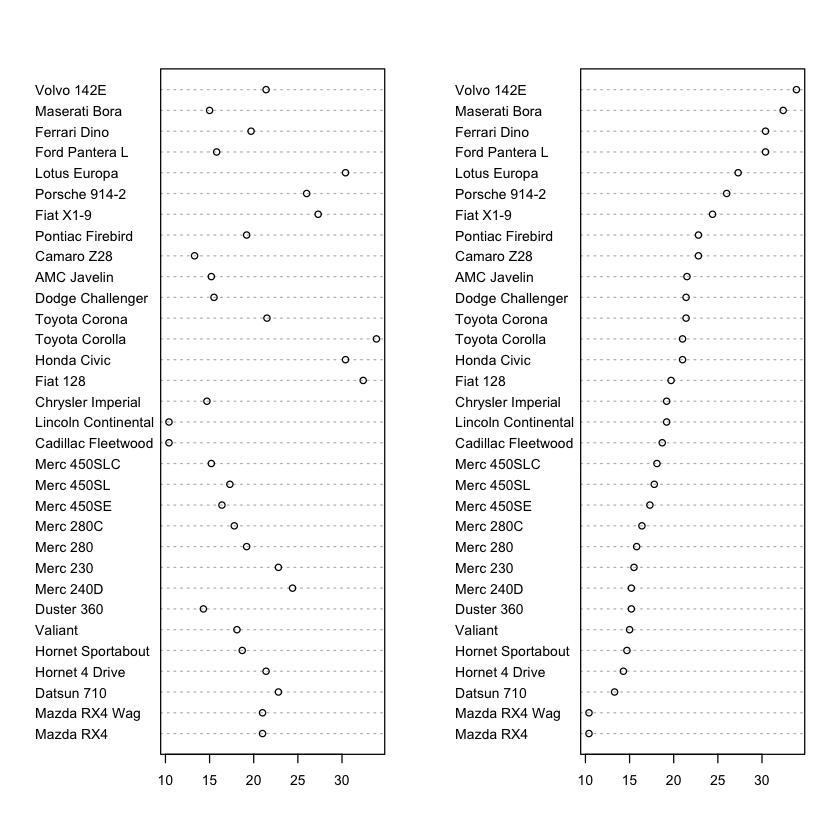

In [7]:
par(mfrow=c(1,2))
dotchart(mtcars$mpg,labels=row.names(mtcars),cex=0.7)
dotchart(mtcars$mpg[order(mtcars$mpg)],labels=row.names(mtcars),cex=0.7)

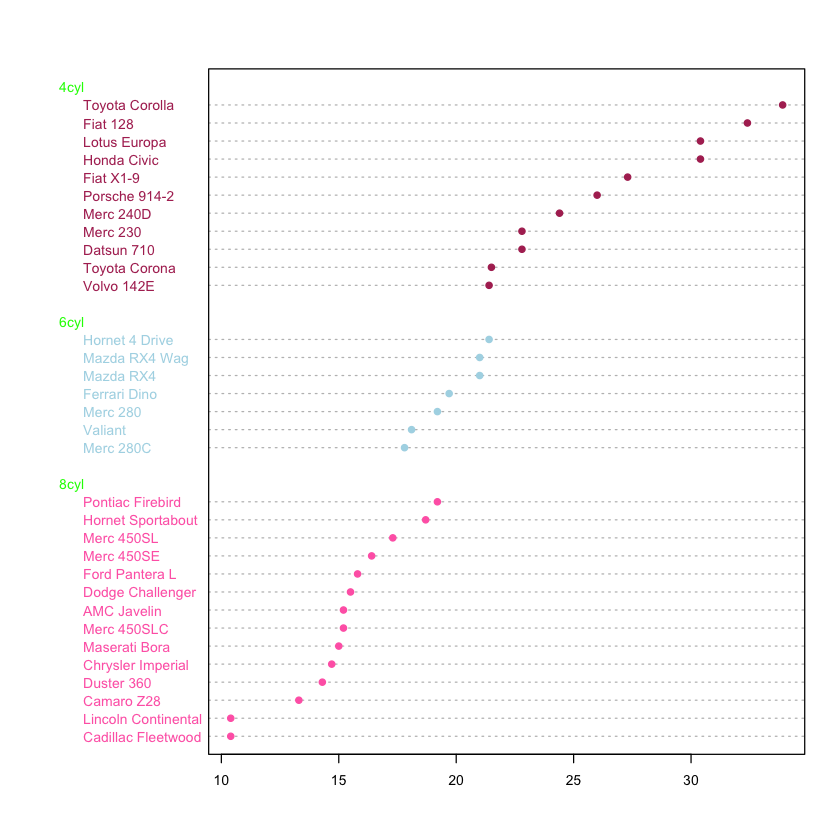

In [13]:
##집단별
cars<-mtcars[order(mtcars$mpg),]
cars$cyl.f <-factor(cars$cyl,levels=c(4,6,8),labels=c('4cyl','6cyl','8cyl'))
cars$colors[cars$cyl.f=='4cyl'] <-'maroon'
cars$colors[cars$cyl.f=='6cyl'] <-'lightblue'
cars$colors[cars$cyl.f=='8cyl'] <-'hotpink'
dotchart(cars$mpg,labels=row.names(cars),cex=0.7,groups = cars$cyl.f,color=cars$colors,gcolor='green',pch=19)

## 선도표
- plot 함수에서 이미 봤다
- lines혼자만은 쓸수 없음 저수준 그래픽 

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	35 obs. of  3 variables:
 $ Tree         : Ord.factor w/ 5 levels "3"<"1"<"5"<"2"<..: 2 2 2 2 2 2 2 4 4 4 ...
 $ age          : num  118 484 664 1004 1231 ...
 $ circumference: num  30 58 87 115 120 142 145 33 69 111 ...
 - attr(*, "formula")=Class 'formula'  language circumference ~ age | Tree
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time since December 31, 1968"
  ..$ y: chr "Trunk circumference"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(mm)"


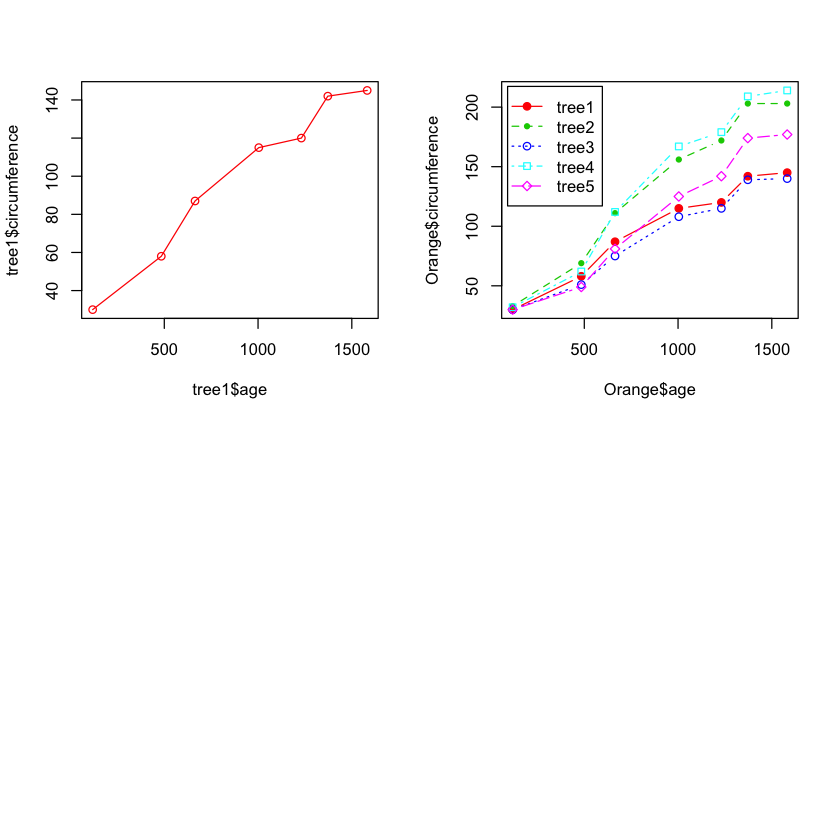

In [58]:
str(Orange) 
# age vs circumference by tree type
# 일단 tree1하나 부터 그려보자
par(mfrow = c(2,2))
tree1<-subset(Orange,subset=(Tree==1))
plot(tree1$age,tree1$circumference,type='o',col=2)


plot(Orange$age,Orange$circumference,type='n')
levels <-nlevels(Orange$Tree) 
colors<-(1:levels)+1
pchs<-(1:levels)+18
ltys<-1:levels
for (i in 1:levels){
    subset <- subset(Orange,subset=(Tree==i))
    lines(subset$age,subset$circumference,type='b',
    col =colors[i],pch=pchs[i],lty=ltys[i])
}
legend('topleft',inset=0.02,legend=c('tree1','tree2','tree3','tree4','tree5'),col=colors,pch=pchs,lty=ltys)

## 산점도
- factor as.numeric() 사용해서 group별 표현이 가능

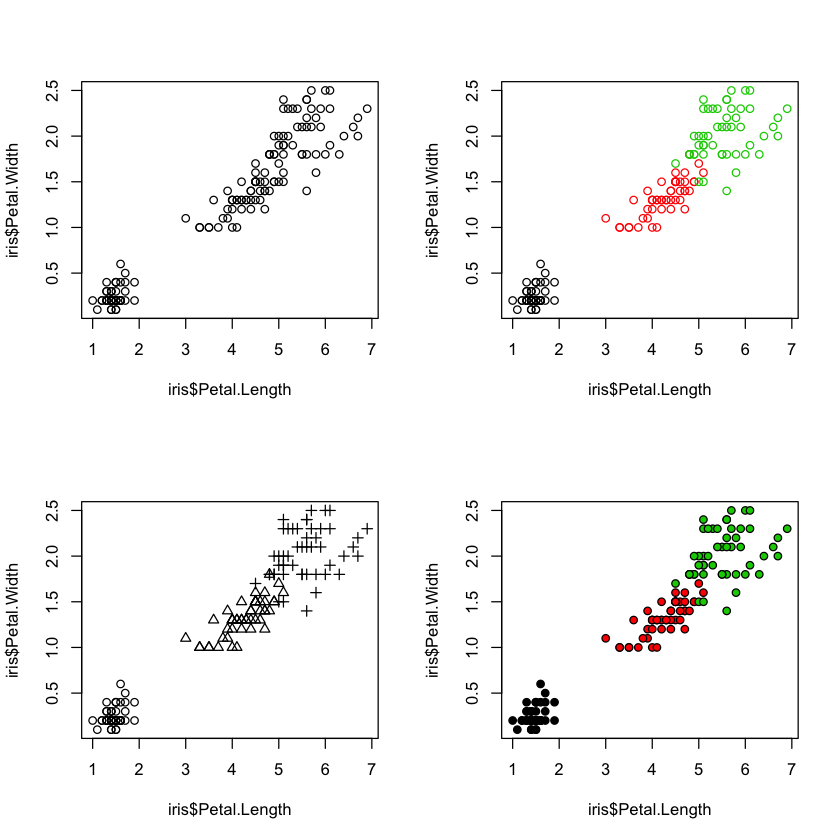

In [65]:
par(mfrow=c(2,2))
plot(iris$Petal.Length,iris$Petal.Width)
plot(iris$Petal.Length,iris$Petal.Width,col=iris$Species)
plot(iris$Petal.Length,iris$Petal.Width,pch=as.numeric(iris$Species))
plot(iris$Petal.Length,iris$Petal.Width,pch=21,bg=iris$Species)

In [66]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

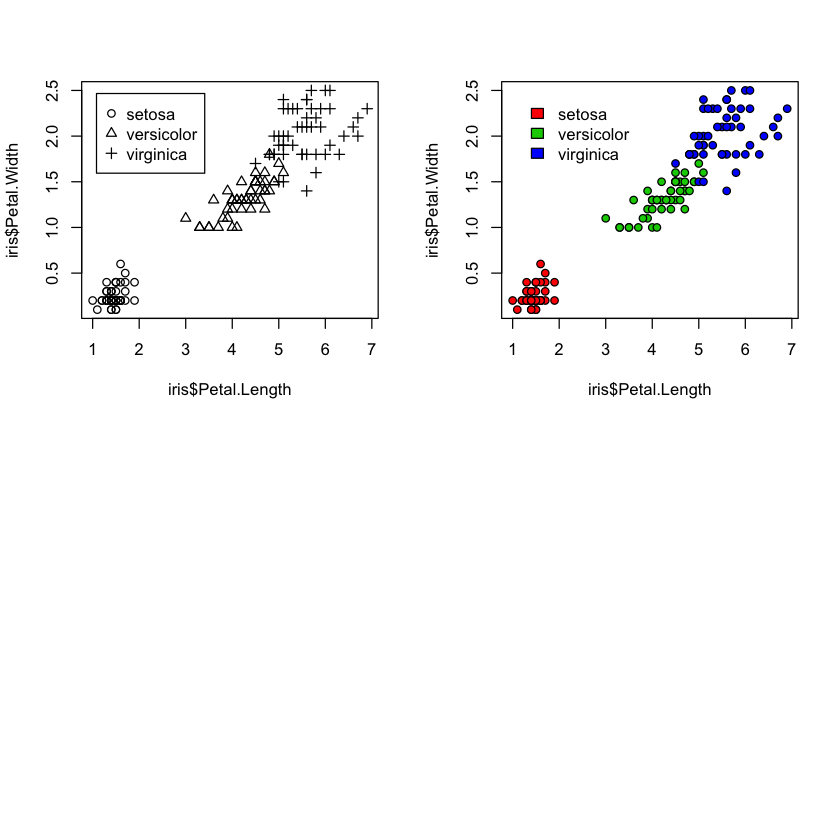

In [75]:
par(mfrow=c(2,2))
plot(iris$Petal.Length,iris$Petal.Width,pch=as.numeric(iris$Species))
legend('topleft',inset=0.05,levels(iris$Species),pch=1:nlevels(iris$Species))

plot(iris$Petal.Length,iris$Petal.Width,pch=21,bg=as.numeric(iris$Species)+1)
# 박스 표시 없애기
legend('topleft',inset=0.05,bty='n',levels(iris$Species),fill=(1:nlevels(iris$Species))+1)

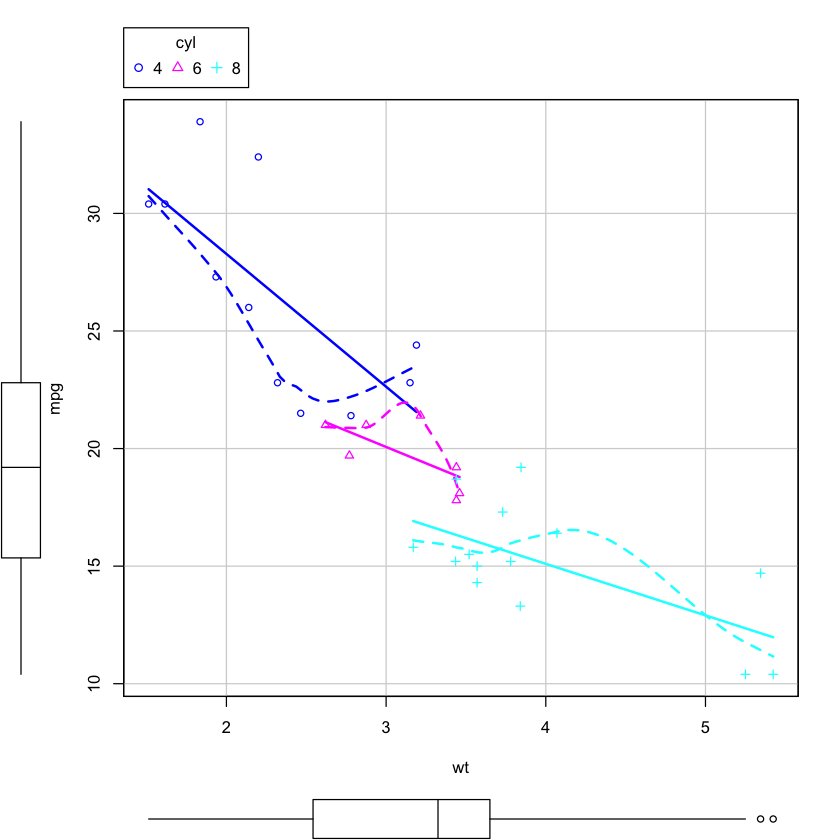

In [81]:
# scatterplot 함수 => 산점도 더욱 다양한 옵션 활용 가능
# car package
library(car)
scatterplot(mpg~wt|cyl,data=mtcars,boxplots = 'xy')